In [102]:
import pandas as pd
import math
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
data = pd.read_csv("gene.csv",index_col = 0)

Text(0, 0.5, 'explained variance ratio(%)')

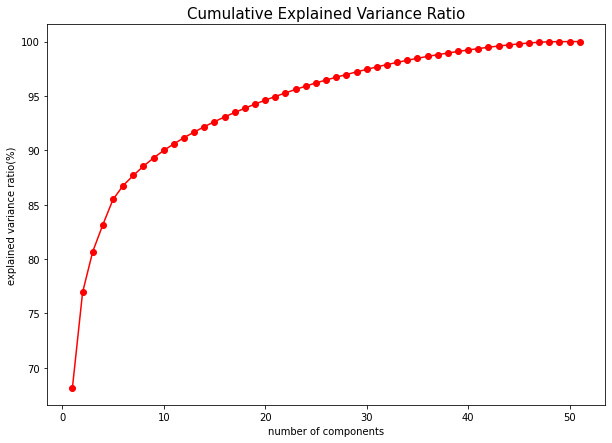

In [96]:
from sklearn.preprocessing import scale
data_norm = scale(data)

pca = PCA(n_components = 'mle')
pca.fit(data_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

Text(0, 0.5, 'explained variance ratio(%)')

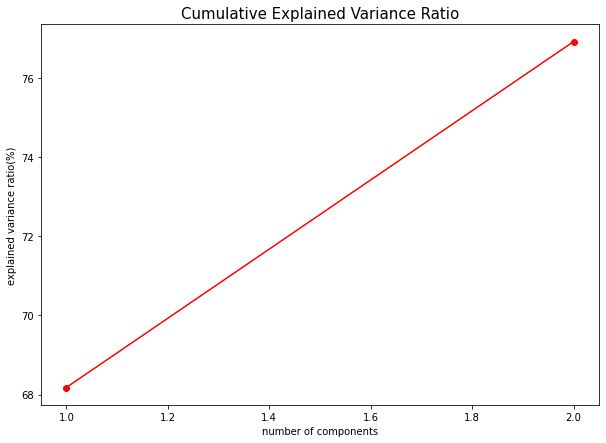

In [98]:
# Only project by pc1 and pc2
from sklearn.preprocessing import scale
data_norm = scale(data)

pca = PCA(n_components = 2)
pca.fit(data_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

In [5]:
pca_df = pca.transform(data_norm)
pca_df.shape

(23684, 2)

In [87]:
u = pca.components_.reshape([52,2])
z = u.T.dot(data_norm.T)
df_approx = u.dot(z).reshape(data.shape)

In [8]:
data_res = pd.DataFrame(data=(data_norm-df_approx),index = data.index, columns = data.columns)

In [9]:
data_res.head(3)

,CY58_1_CD45_F08_S1028_comb,CY58_1_CD45_A05_S965_comb,CY58_1_CD45_D01_S997_comb,cy80.Cd45.pos.Pd1.neg.S293.E05.S293.comb,cy82.CD45.pos.3.A07.S7.comb,cy82.CD45.pos.3.B08.S20.comb,cy53.1.CD45.pos.2.A04.S964.comb,cy53.1.CD45.pos.1.D01.S37.comb,cy53.1.CD45.pos.2.B08.S980.comb,cy53.1.CD45.pos.1.F04.S64.comb,...,cy60_1_cd_45_pos_3_C04_S316_comb,CY89FNA_A03_S195_comb,CY88CD45POS_2_F07_S451_comb,CY88CD45_150813_D05_S329_comb,CY88CD45POS_2_G06_S462_comb,CY94CD45POS_1_E04_S148_comb,CY88CD45POS_2_F09_S453_comb,CY84_PRIM_POS_All_7_E07_S247_comb,CY84_PRIM_POS_All_7_B06_S210_comb,CY84_PRIM_POS_All_8_E10_S154_comb
C9orf152,-0.046124,-3.545455,-0.062904,0.006041,-0.010713,-0.009014,-0.043557,-0.075699,-0.017701,-0.044791,...,-0.100306,-0.008015,-0.029219,-0.162966,-0.033382,0.008594,-0.022169,-0.000458,0.015679,0.007504
RPS11,9.229329,8.760094,2.113379,2.894422,0.841377,5.114128,7.937011,4.039091,17.063287,7.272768,...,4.690430,2.870081,7.721619,7.468801,10.606953,7.092032,3.268144,-0.087569,1.324649,3.287528
ELMO2,1.229986,-0.047597,-0.042117,-0.079039,0.003833,0.149355,-0.027639,-0.025661,0.089242,-0.022666,...,-0.060442,-0.007436,1.495882,0.004034,-0.033106,-0.000725,-0.053493,0.000876,1.008937,0.007504


<AxesSubplot:>

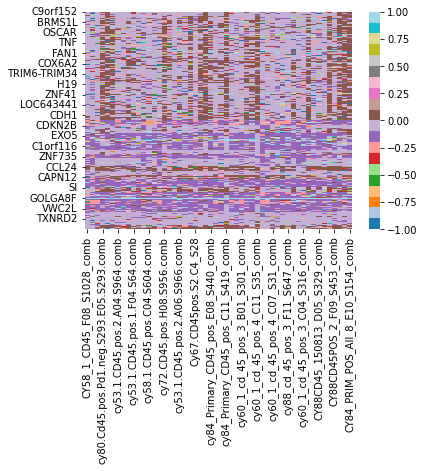

In [11]:
sns.heatmap(data_res, annot=False, vmin=-1, vmax=1, cmap="tab20")

## Binary MF

In [27]:
def matrix_product(a,b):
    # follow online instruction of binary matrix production
    # https://www2.math.upenn.edu/~deturck/m170/wk8/lecture/matrix.html
    x = np.zeros([a.shape[0],b.shape[1]])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            sum = 0
            for k in range(b.shape[0]):
                sum += (a[i,k]*b[k,j])
            x[i,j] = sum % 2
    return x

In [28]:
def matrix_product_paper(a,b):
    x = np.zeros([a.shape[0],b.shape[1]])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(a.shape[1]):
                if (a[i,k] or b[k,j]) == 1:
                    tmp = 1
                    break;
                else:
                    tmp = 0
            x[i,j] = tmp
    return x

In [29]:
def matrix_subtract(a,b):
    """
    parameter:
        a, of shape m*n
        b, of shape m*n
    return:
        res, of shape m*n
    aim:
        help to compute the residule between original matrix a, and approximation matrix b
    """
    res = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            res[i][j] = (a[i][j] and not b[i][j]) or (not a[i][j] and b[i][j])
    return res

In [30]:
def simi_checker(l, e, t):
    """
    parameter:
        l: a vector of values
        e: a vector of values
        t: the threshold of vector similarity
    output:
        True, if similarity between l and e >= t
        False, otherwise
    """
    """
    same = 0
    division = 0
    for val in zip(l, e):
        if val[1] == 1:
            division += 1
            if val[0] == val[1]:
                same += 1
    """
        """
        if(val[0] != val[1]):
            division += 1
        else:
            if(val[1] == 1):
                same += 1
        """
    """
    if same/division >= t:
        return True
    else:
        return False
    """
    return (np.abs(l-e).sum() / e.sum()) >= t

In [31]:
def reconstruct(x,med_col,cols,med_row,rows):
    # reconstruct matrix based on cols
    col_df_1 = pd.DataFrame(x.values[:,med_col], index =x.index) # m x 1 matrix, samples
    col_df_2 = pd.DataFrame(np.zeros([1,len(x.columns)]), columns = x.columns) # 1 x n matrix, features
    for i in cols:
        col_df_2[i] = 1
    col_df_1.sort_index(axis = 0, inplace=True)
    col_df_2.sort_index(axis = 1, inplace=True)
    # reconstruct matrix based on rows
    row_df_1 = pd.DataFrame(np.zeros(len(x.index)),index = x.index)
    row_df_2 = pd.DataFrame(x.values[med_row,:].reshape(1,-1),columns = x.columns)
    for i in rows:
        row_df_1.loc[i] = 1
    row_df_1.sort_index(axis = 0, inplace=True)
    row_df_2.sort_index(axis = 1, inplace=True)
    # col pattern production
    col_pattern = matrix_product(col_df_1.values, col_df_2.values)
    # row pattern production
    row_pattern = matrix_product(row_df_1.values, row_df_2.values)
    return col_pattern, row_pattern, col_df_1, col_df_2, row_df_1, row_df_2

In [32]:
def reconstruct_weak(x,d_1,e_1,d_2,e_2):
    # reconstruct matrix based on cols
    l1_1 = pd.DataFrame(d_1, index =x.index) # m x 1 matrix, samples
    l1_2 = pd.DataFrame(np.zeros([1,len(x.columns)]), columns = x.columns) # 1 x n matrix, features
    for i in e_1:
        l1_2[i] = 1
    # reconstruct matrix based on rows
    l2_1 = pd.DataFrame(np.zeros(len(x.index)),index = x.index)
    l2_2 = pd.DataFrame(d_2.reshape(1,-1),columns = x.columns)
    for i in e_2:
        l2_1.loc[i] = 1
    # sort by index and columns
    l1_1.sort_index(axis = 0,inplace=True)
    l1_2.sort_index(axis = 1,inplace=True)
    l2_1.sort_index(axis = 0,inplace=True)
    l2_2.sort_index(axis = 1,inplace=True)
    # col pattern production
    pattern_1 = matrix_product(l1_1.values, l1_2.values)
    # row pattern production
    pattern_2 = matrix_product(l2_1.values, l2_2.values)
    return pattern_1, pattern_2, l1_1,l1_2,l2_1,l2_2

In [33]:
def bi_growth(x, t=0.9):
    """
    parameter: 
        x, the input Binary Matrix
        t, the threshold of vector similarity
    output:
        (a,b):
            a: list of rows(columns) of high similarity with b
            b: median row(column) of x
    """
    # UTL operation on X
    # drop columns and rows with all zeros
    x = x.loc[(x!=0).any(axis=1)]
    x = x.loc[:, (x != 0).any(axis=0)]
    # reorder based on idea in MEBF paper
    idx = x.eq(1).sum(axis=1).sort_values(ascending=False).index
    x = x.reindex(idx)
    cols = x.eq(1).sum(axis=0).sort_values(ascending=True).index
    x = x[cols]
    # d represents the median column of x
    med_col = len(x.columns) // 2
    # d = x[med_col].values
    d = x.values[:,med_col]
    # f represents the median row of x
    med_row = len(x.index) // 2
    # f = x.loc[med_row].values
    f=x.values[med_row,:]
    # iterate over each column and compute similarity
    col_candi = []
    for col in x.columns:
        if simi_checker(x[col].values, d,t):
            col_candi.append(col)
    # iterate over each column and compute similarity
    row_candi = []
    for row in x.index:
        if simi_checker(x.loc[row].values, f,t):
            row_candi.append(row)
    # reconstruct the approximation matrix based on rows and cols
    col_pattern, row_pattern,col_df_1,col_df_2,row_df_1,row_df_2 = reconstruct(x,med_col,col_candi,med_row,row_candi)
    # sort rows and columns
    x.sort_index(axis = 0,inplace=True)
    x.sort_index(axis = 1,inplace=True)
    # compute residule
    col_residule = matrix_subtract(x.values, col_pattern)
    row_residule = matrix_subtract(x.values, row_pattern)
    # compare cost
    if sum(col_residule).sum() < sum(row_residule).sum():
        # col pattern is better
        return col_df_1, col_df_2
    else:
        # row pattern is better
        return row_df_1,row_df_2

In [34]:
def vector_and_op(a,b):
    res = list()
    for val in zip(a,b):
        if(val[0] and val[1]):
            res.append(1)
        else:
            res.append(0)
    return np.array(res).reshape(a.shape)

In [35]:
def weak_signal_detection(x,t=0.9):
    # UTL operation on X
    # drop columns and rows with all zeros
    x = x.loc[(x!=0).any(axis=1)]
    x = x.loc[:, (x != 0).any(axis=0)]
    # UTL operation on X
    idx = x.eq(1).sum(axis=1).sort_values(ascending=False).index
    x = x.reindex(idx)
    cols = x.eq(1).sum(axis=0).sort_values(ascending=True).index
    x = x[cols]
    # compute d_1
    d_1 = vector_and_op(x.values[:,-2],x.values[:,-1])
    # iterate over each column and compute similarity, filter cols
    e_1 = []
    for col in x.columns:
        if simi_checker(x[col].values, d_1,t):
            e_1.append(col)
    # iterate over each column and compute similarity, filter rows
    d_2 = vector_and_op(x.values[0,:],x.values[1,:])
    e_2 = []
    for row in x.index:
        if simi_checker(x.loc[row].values, d_2,t):
            e_2.append(row)        
    # reconstruct the approximation matrix based on rows and cols
    pattern_1, pattern_2, l1_1,l1_2,l2_1,l2_2 = reconstruct_weak(x,d_1,e_1,d_2,e_2)
    # sort by index and columns
    x.sort_index(axis = 0,inplace=True)
    x.sort_index(axis = 1,inplace=True)
    # compute residule
    l1 = matrix_subtract(x.values, pattern_1)
    l2 = matrix_subtract(x.values, pattern_2)
     # compare cost
    if sum(l1).sum() < sum(l2).sum():
        return l1_1,l1_2
    else:
        return l2_1,l2_2

In [83]:
def MEBF(x,t=0.9):
    # re_A, re_B to record the pattern
    re_A = pd.DataFrame(index =x.index.values)
    re_B = pd.DataFrame(columns = x.columns.values)
    cost = float('inf')
    x_residule = x.copy()
    while True:
        new_1, new_2 = bi_growth(x_residule,t)
        # check whether new pattern could fit better
        A_tmp = pd.concat([re_A,new_1],axis = 1).fillna(0)
        B_tmp = pd.concat([re_B,new_2],axis = 0).fillna(0)
        tmp_residule = matrix_subtract(x.values,matrix_product(A_tmp.values,B_tmp.values))
        if sum(tmp_residule).sum() > cost:
            # weak signal detection
            l1,l2 = weak_signal_detection(x_residule,t)
            A_tmp = pd.concat([re_A,l1],axis = 1).fillna(0)
            B_tmp = pd.concat([re_B,l2],axis = 0).fillna(0)
            tmp_residule = matrix_subtract(x.values,matrix_product(A_tmp.values,B_tmp.values))
            print("weak detection")
            print("old cost", cost)
            print("new cost", sum(tmp_residule).sum())
            if sum(tmp_residule).sum() >= cost:
                break
        # update re_A, re_B, and cost
        re_A = A_tmp.copy()
        re_B = B_tmp.copy()
        cost = sum(tmp_residule).sum()
        # update x_residule
        # tmp = pd.DataFrame(matrix_product(new_1.values,new_2.values), index = x.index, columns = x.columns)
        tmp = pd.DataFrame(matrix_product(re_A.values,re_B.values), index = x.index, columns = x.columns)
        x_residule = x - tmp
        x_residule[x_residule < 0] = 0
        """
        for i in tmp.index:
            for j in tmp.columns:
                if(tmp.loc[i][j] == 1):
                    x_residule.loc[i][j] = 0
        """
        # x_residule = pd.DataFrame(tmp_residule, index = x.index, columns = x.columns)
    return re_A, re_B

In [19]:
np.array([[1,1,0,1,1,1,0,1,0,0,0],[1,1,1,1,1,1,1,1,1,1,1],[1,1,0,1,1,1,1,0,1,0,1],
         [0,1,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0,1,0,0],
         [0,0,0,1,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,0],[1,1,0,1,0,1,1,0,0,0,0],
         [0,1,1,1,1,0,0,0,0,0,0,],[1,1,0,1,1,0,0,0,0,0,0]])

array([[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

In [20]:
test_x = pd.DataFrame(np.array([[1,1,0,1,1,1,0,1,0,0,0],[1,1,1,1,1,1,1,1,1,1,1],[1,1,0,1,1,1,1,0,1,0,1],
         [0,1,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0,1,0,0],
         [0,0,0,1,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,0],[1,1,0,1,0,1,1,0,0,0,0],
         [0,1,1,1,1,0,0,0,0,0,0,],[1,1,0,1,1,0,0,0,0,0,0]]), index = range(1,12), columns = range(1,12))

In [ ]:
A,B = MEBF(data_res.copy(),t=0.8)

# Does not work well in our cases

# Now focus on BCV, to see what it could bring to us

In [79]:
data_res

,CY58_1_CD45_F08_S1028_comb,CY58_1_CD45_A05_S965_comb,CY58_1_CD45_D01_S997_comb,cy80.Cd45.pos.Pd1.neg.S293.E05.S293.comb,cy82.CD45.pos.3.A07.S7.comb,cy82.CD45.pos.3.B08.S20.comb,cy53.1.CD45.pos.2.A04.S964.comb,cy53.1.CD45.pos.1.D01.S37.comb,cy53.1.CD45.pos.2.B08.S980.comb,cy53.1.CD45.pos.1.F04.S64.comb,...,cy60_1_cd_45_pos_3_C04_S316_comb,CY89FNA_A03_S195_comb,CY88CD45POS_2_F07_S451_comb,CY88CD45_150813_D05_S329_comb,CY88CD45POS_2_G06_S462_comb,CY94CD45POS_1_E04_S148_comb,CY88CD45POS_2_F09_S453_comb,CY84_PRIM_POS_All_7_E07_S247_comb,CY84_PRIM_POS_All_7_B06_S210_comb,CY84_PRIM_POS_All_8_E10_S154_comb
C9orf152,-0.046124,-3.545455,-0.062904,0.006041,-0.010713,-0.009014,-0.043557,-0.075699,-0.017701,-0.044791,...,-0.100306,-0.008015,-0.029219,-0.162966,-0.033382,0.008594,-0.022169,-0.000458,0.015679,0.007504
RPS11,9.229329,8.760094,2.113379,2.894422,0.841377,5.114128,7.937011,4.039091,17.063287,7.272768,...,4.690430,2.870081,7.721619,7.468801,10.606953,7.092032,3.268144,-0.087569,1.324649,3.287528
ELMO2,1.229986,-0.047597,-0.042117,-0.079039,0.003833,0.149355,-0.027639,-0.025661,0.089242,-0.022666,...,-0.060442,-0.007436,1.495882,0.004034,-0.033106,-0.000725,-0.053493,0.000876,1.008937,0.007504
CREB3L1,-0.083160,-0.047343,-0.029355,0.004054,0.003833,-0.009014,-0.027639,-0.319358,-0.005476,-0.022666,...,-0.066950,-0.008015,-0.029219,-0.039867,-1.895372,-0.005872,-0.065158,-0.080862,0.015679,0.000507
PNMA1,-0.047904,-0.194464,-0.029355,0.006041,0.003833,-0.051430,-0.027639,-0.025661,-0.015605,-0.021795,...,-0.279918,-0.453478,0.134519,-0.025650,-0.095168,-0.000725,-0.022169,0.001613,-0.015114,0.007504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,-0.004923,-0.110035,0.011759,0.046942,-0.391364,0.125776,0.013475,0.015452,0.025508,1.672937,...,1.519068,1.311715,0.006254,0.015464,3.764085,0.278102,0.018945,1.979106,1.358520,0.048618
SNRPD2,-0.004923,1.915005,-0.445617,-0.275640,0.034246,0.032100,-0.450615,1.185483,0.989735,0.942307,...,1.224144,0.204571,-0.397037,-0.189278,0.007732,-0.102243,1.129362,-0.001573,0.364812,0.046552
SLC39A6,-0.004923,-0.006230,0.011759,-0.104715,0.044947,0.032100,-0.297375,-0.220616,0.025508,0.086691,...,-0.147645,0.033098,-0.085741,0.015464,-12.425810,-0.153179,0.614082,-0.029935,0.038689,0.047449
CTSC,0.431394,2.368555,0.766325,1.223353,0.041232,1.909604,0.620502,1.800894,0.088629,2.485801,...,0.736820,0.174169,0.066299,0.053153,-0.330083,0.022739,0.181769,0.113319,0.121488,-0.108214


In [86]:
# Current idea: based on shuffle and try different number of components to see 
# whether there is still a huge difference if brings in a new component

In [107]:
random.sample(list(data.index), 3)

['ANKRD34A', 'SNORD75', 'CCDC74B']

In [110]:
data_norm.shape

(23684, 52)

(52, 1)
(52, 2)
(52, 3)
(52, 4)
(52, 5)
(52, 6)
(52, 7)
(52, 8)
(52, 9)


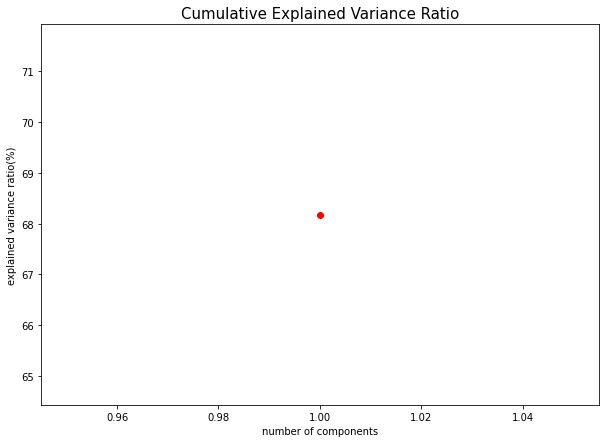

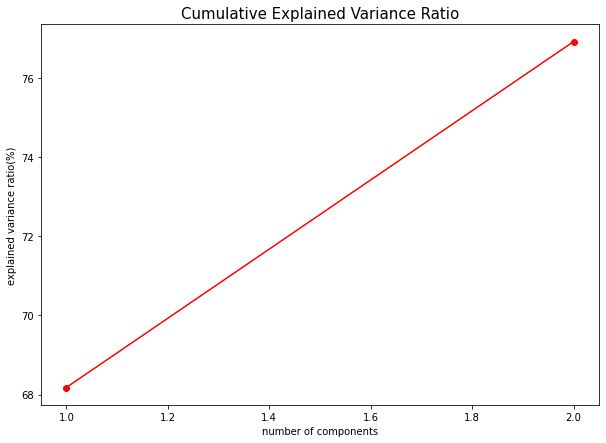

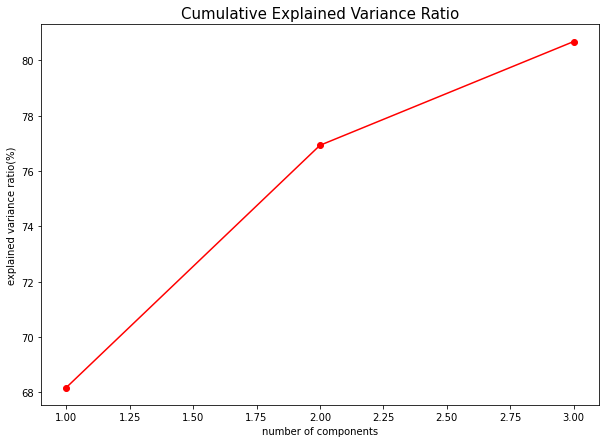

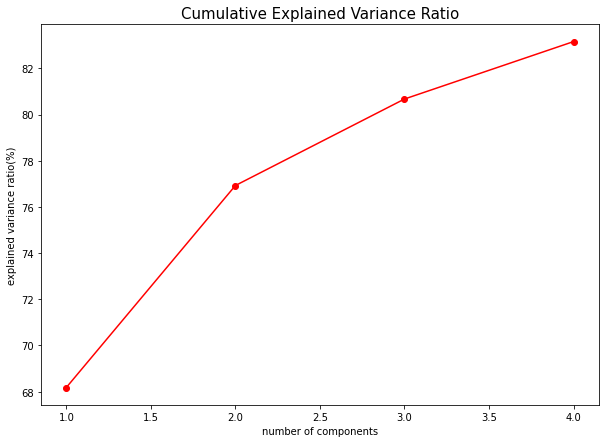

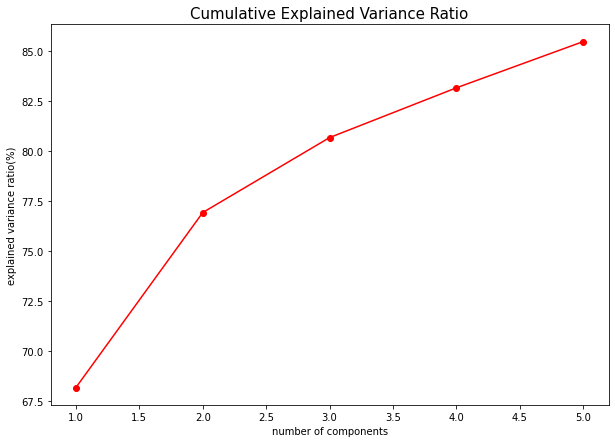

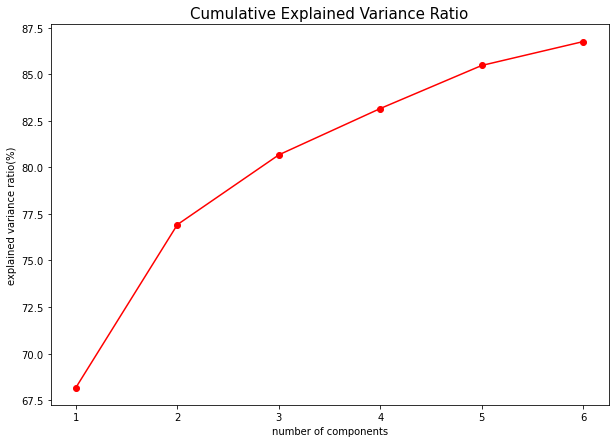

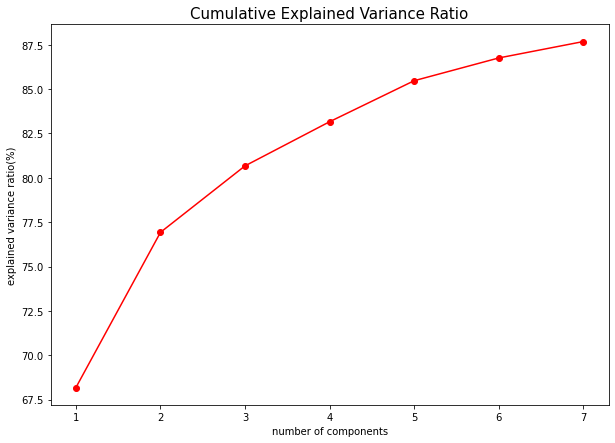

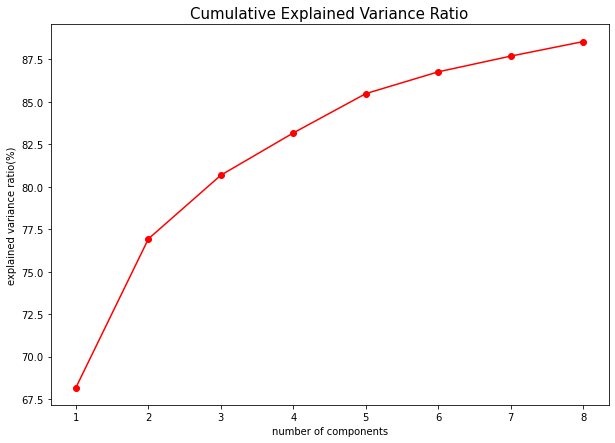

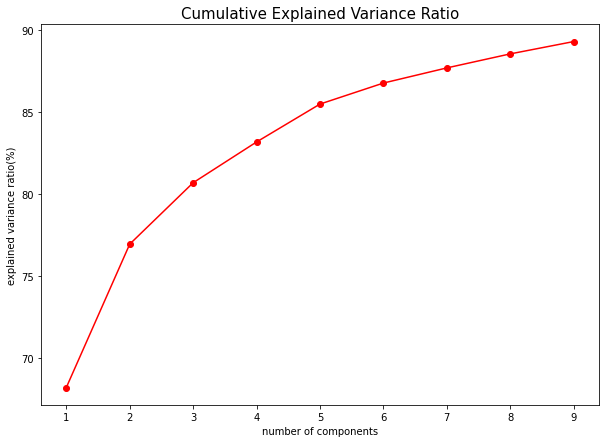

In [101]:
data_norm = pd.DataFrame(scale(data),index = data.index, columns = data.columns)
recorder = pd.DataFrame(index = range(1,11),columns = range(1,6))
# iterate over number of components
for num in range(1,11):
    for time in range(1,6):
        # leave out submatrix
        rows_out = random.sample(list(data.index), 5)
        cols_out = random.sample(list(data.columns),3)
        cols_out = data
    """
    evr = pca.explained_variance_ratio_ * 100
    # 查看累计解释方差比率与主成分个数的关系
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
    ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
    ax.set_xlabel("number of components")
    ax.set_ylabel("explained variance ratio(%)")
    """
    u = pca.components_.reshape([52,-1])
    z = u.T.dot(data_norm.T)
    df_approx = u.dot(z).reshape(data.shape)
    